<h1>Question:1</h1>

In [19]:
#Step:1(Import library)
import pandas as pd

In [20]:
#Step:2&3(Import dataset and assign it to a variable called users)
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [21]:
#Step:4(Discover what is the mean age per occupation)
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [22]:
#Step:5(Discover the Male ratio per occupation and sort it from the most to the least)
users['is_male'] = users.gender.apply(lambda x: True if x == 'M' else False)
(users.groupby('occupation').is_male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

In [23]:
#Step:6(For each occupation, calculate the minimum and maximum ages)
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [24]:
#Step:7(For each combination of occupation and sex, calculate the mean age)
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [35]:
#Step:8(For each occupation present the percentage of women and men)

# create a DataFrame and apply count to gender
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

# create a DataFrame and apply count for each occupation
occup_count = users.groupby(['occupation']).count()

# divide the gender_ocup per the occup_count and multiply per 100
occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

<h1>Question:2</h1>

In [25]:
#Step:1(Import the necessary libraries)
import pandas as pd

In [26]:
#Step:2&3(Import dataset and assigned it to variable euro12)
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [27]:
#Step:4(Select Goal Column)
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [30]:
#Step:5(Count of teams participated)
euro12['Team'].count()

16

In [29]:
#Step:6(No.of cols in dataset)
euro12.shape[1]

35

In [31]:
#Step:7(View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline)
discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [32]:
#Step:8(Sort the teams by Red Cards, then to Yellow Cards)
discipline.sort_values(by = ['Red Cards','Yellow Cards'], inplace = True)
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [33]:
#Step:9(Calculate the mean Yellow Cards given per Team)
euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [34]:
#Step:10(Filter teams that scored more than 6 goals)
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [38]:
#Step:11(Teams that start with G)
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [37]:
#Step:12(Select first 7 cols)
euro12.iloc[ : , : 7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [40]:
#Step:13(All columns except the last 3)
euro12.iloc[ : , : -3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [41]:
#Step:14(Present only the Shooting Accuracy from England, Italy and Russia)
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


<h1>Question:3</h1>

In [43]:
#Step:1(Import the necessary libraries)
import pandas as pd
import random

In [45]:
#Step:2(Create 3 differents Series, each of length 100, as follows:)
#The first a random number from 1 to 4
first = [[random.randint(1, 4)] for i in range(100)]
df1 = pd.DataFrame(first)
#The second a random number from 1 to 3
second = [[random.randint(1, 3)] for i in range(100)]
df2 = pd.DataFrame(second)
#The third a random number from 10,000 to 30,000
third = [[random.randint(10000, 30000)] for i in range(100)]
df3 = pd.DataFrame(third)

In [46]:
#Step:3(Create a DataFrame by joinning the Series by column)
df = pd.concat([df1, df2 , df3], axis=1)
df

,0,0,0
0,2,1,21506
1,4,1,21163
2,2,2,11190
3,1,2,11193
4,2,3,14780
...,...,...,...
95,1,2,17612
96,3,1,11197
97,4,1,11513
98,3,1,17463


In [47]:
#Step:4(Change the name of the columns to bedrs, bathrs, price_sqr_meter)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
df

,bedrs,bathrs,price_sqr_meter
0,2,1,21506
1,4,1,21163
2,2,2,11190
3,1,2,11193
4,2,3,14780
...,...,...,...
95,1,2,17612
96,3,1,11197
97,4,1,11513
98,3,1,17463


In [48]:
#Step:5(Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn')
df_new = df.bedrs.astype(str).str.cat(df.bathrs.astype(str)).str.cat(df.price_sqr_meter.
astype(str))
df_new.columns = ['bigcolumn']
df_new

0     2121506
1     4121163
2     2211190
3     1211193
4     2314780
       ...   
95    1217612
96    3111197
97    4111513
98    3117463
99    1213358
Name: bedrs, Length: 100, dtype: object

In [49]:
#Step:6&7(Reindex the DataFrame so it goes from 0 to 299)
df_new = df_new.reset_index(drop=True)
df_new.reset_index()
df_new.reindex(index=range(0,299))

0      2121506
1      4121163
2      2211190
3      1211193
4      2314780
        ...   
294        NaN
295        NaN
296        NaN
297        NaN
298        NaN
Name: bedrs, Length: 299, dtype: object

<h1>Question:4</h1>

In [50]:
#Step:1(Import the necessary libraries)
import pandas as pd
import numpy as np

In [54]:
#Step:2(Import the dataset)
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [56]:
#Step:3(Assign it to a variable called data and replace the first 3 columns by a proper datetime index.)
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
#re-arrange cols
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [57]:
#Step:4(Year 2061? Do we really have data from this year? Create a function to fix it and apply it.)
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [59]:
#Step:5(Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].)
newData = data.set_index("Date")
newData.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [61]:
#Step:6(Compute how many values are missing for each location over the entire record.They should be ignoredin all calculations below.)
newData.isnull().values.ravel().sum()

31

In [62]:
#Step:7(Compute how many non-missing values there are in total.)
nData = newData.count()
print("There are total ", nData.sum(), " Non-missing values.")

There are total  78857  Non-missing values.


In [64]:
#Step:8(Calculate the mean windspeeds of the windspeeds over all the locations and all the times)
x= newData.mean()
x

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [67]:
#Step:9(Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days)
def stats(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res

In [68]:
#A different set of numbers for each location.
loc_stats = newData.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [69]:
#Step:10(Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.)
day_stats = newData.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [70]:
#Step:11(Find the average windspeed in January for each location. Treat January 1961 and January 1962 both asJanuary.)
jan_data = newData[newData.index.month == 1]
jan_data.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [71]:
#Step:12(Downsample the record to a yearly frequency for each location.)
print( "Yearly:\n", newData.resample('A').mean())

Yearly:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507  

In [72]:
#Step:13(Downsample the record to a monthly frequency for each location.)
print("Monthly:\n", newData.resample('M').mean())

Monthly:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.63516

In [73]:
#Step:14(Downsample the record to a weekly frequency for each location.)
print("Weekly:\n", newData.resample('W').mean())

Weekly:
                   RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.80142

In [74]:
#Step:15(Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) forthe first 52 weeks.)
#fYear = newData[newData.index.year == 1961]
stats1 = newData.resample('W').mean().apply(lambda x: [x.count(),x.min(),x.max(),x.mean(),x.std()])
print(stats1)

          RPT         VAL         ROS         KIL         SHA         BIR  \
0  940.000000  940.000000  940.000000  940.000000  939.000000  940.000000   
1    3.874286    2.452857    4.901429    1.447143    2.775714    1.382857   
2   24.010000   23.715714   21.384286   14.517143   22.897143   16.010000   
3   12.365304   10.647725   11.661255    6.309334   10.455607    7.094787   
4    3.466600    3.372501    2.840361    2.186432    3.146715    2.556633   

          DUB         CLA         MUL         CLO         BEL         MAL  
0  940.000000  940.000000  940.000000  940.000000  940.000000  940.000000  
1    2.471429    2.284286    2.262857    1.571429    3.661429    5.124286  
2   20.474286   17.861429   17.460000   17.932857   26.617143   30.374286  
3    9.801271    8.496123    8.496452    8.710639   13.125912   15.597171  
4    3.308180    2.853029    2.638349    2.924546    3.757189    4.468526  


<h1>Question:5</h1>

In [76]:
#Step:1(Import the necessary libraries)
import pandas as pd
import numpy as np

In [77]:
#Step:2&3(Import the dataset and Assign it to a variable called chipo.)
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [78]:
#Step:4(See the first 10 entries)
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [82]:
#Step:5(What is the number of observations in the dataset?)
chipo.shape[0]

4622

In [80]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [83]:
#Step:6(What is the number of columns in the dataset?)
chipo.shape[1]

5

In [84]:
#Step:7(Print the name of all the columns.)
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [85]:
#Step:8(How is the dataset indexed?)
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [86]:
#Step:9(Which was the most-ordered item?)
item = chipo.groupby('item_name')
item = item.sum()
item = item.sort_values(['quantity'], ascending=False)
item.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [87]:
#most ordered item
item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [88]:
#Step:10(For the most-ordered item, how many items were ordered?)
c = chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [91]:
#Step:11(What was the most ordered item in the choice_description column?)
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [92]:
#Step:12(How many items were orderd in total)
chipo.quantity.sum()

4972

In [93]:
#Step:13(check item price type)
chipo.item_price.dtype

dtype('O')

In [95]:
chipo.item_price.dtype

dtype('float64')

In [99]:
#Step:14(How much was the revenue for the period in the dataset?/)
revenue = (chipo['quantity']* chipo['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


In [101]:
#Step:15(How many orders were made in the period?)
chipo.order_id.value_counts().count()

1834

In [102]:
#Step:16(What is the average revenue amount per order?)
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.394231188658654

In [103]:
#Step:17(How many different items are sold?)
chipo.item_name.value_counts().count()

50

<h1>Question:6</h1>
<li>Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014.
Label both lines and show the legend.</li>

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
#data.head()

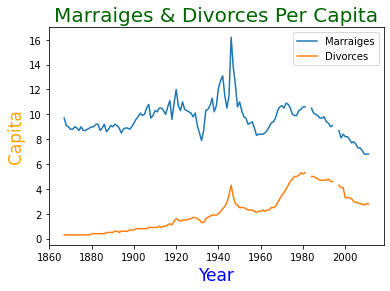

In [113]:
data.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
plt.title('Marraiges & Divorces Per Capita', color = 'Darkgreen', fontsize = 20)
plt.xlabel('Year', color = 'Blue', fontsize = 17)
plt.ylabel('Capita', color = 'Orange', fontsize = 17)
plt.show()

<h1>Question:7</h1>
<li>Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between
1900, 1950, and 2000.</li>

In [110]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
newData = data.loc[data.Year.isin([1900,1950,2000]),['Year','Marriages_per_1000','Divorces_per_1000']]
newData

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


([<matplotlib.axis.XTick at 0x1c6f27077c0>,
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

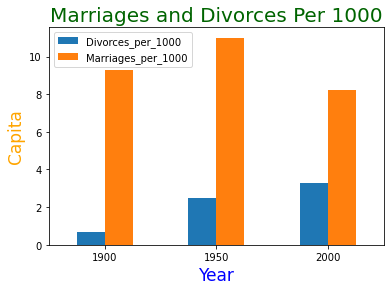

In [112]:
newData[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per 1000", color = 'Darkgreen', fontsize = 20)
plt.xlabel('Year', color = 'Blue', fontsize = 17)
plt.ylabel('Capita', color = 'Orange', fontsize = 17)
positions = (0,1,2)
labels = ("1900", "1950", "2000")
plt.xticks(positions, labels, rotation = 0)

Text(0, 0.5, 'Capita')

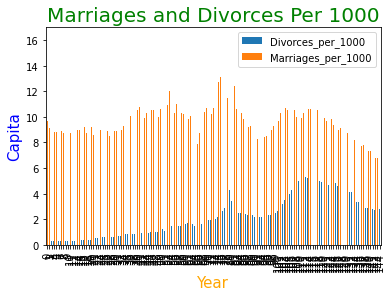

In [114]:
#marriages & Divorces for all year 1867 to 2014
data[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()
plt.title("Marriages and Divorces Per 1000", color = 'Green', fontsize = 20)
plt.xlabel('Year', color = 'Orange', fontsize = 15)
plt.ylabel('Capita', color = 'Blue', fontsize = 15)

<h1>Question:8</h1>
<li>Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count
and label each bar with the corresponding actor's name.</li>

In [115]:
data = pd.read_csv('actor_kill_counts.csv')
newData = data.sort_values("Count", ascending = True)

Text(0, 0.5, 'Actor')

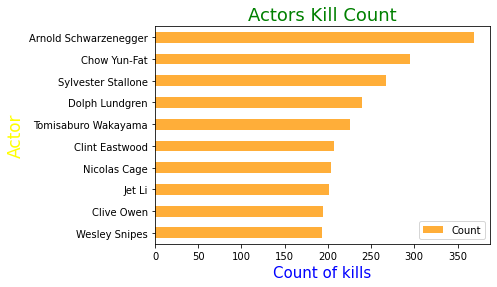

In [118]:
newData.plot.barh(x='Actor', y='Count', color = '#FFAE39')
plt.title('Actors Kill Count', fontsize=18, color = 'Green')
plt.xlabel('Count of kills', color = 'Blue', fontsize = 15)
plt.ylabel('Actor', color = 'yellow', fontsize = 17)

<h1>Question:9</h1>
<li>Create a pie chart showing the fraction of all Roman Emperors that were assassinated.</li>

In [119]:
data = pd.read_csv('roman-emperor-reigns.csv')

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
newdata = data.groupby("Cause_of_Death")['Emperor'].count()

Text(0.5, 1.0, "Roman Emperor's Cause of Death")

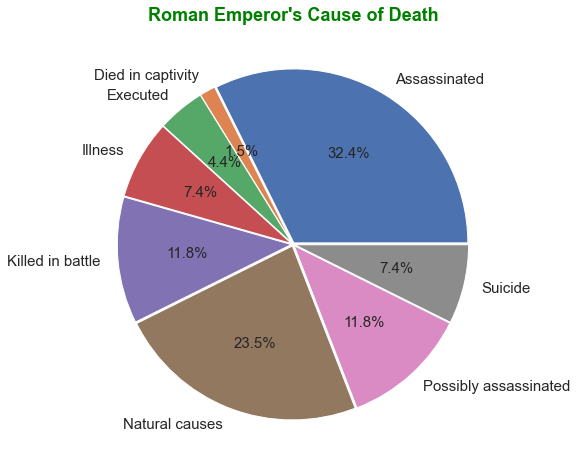

In [121]:
newdata.plot.pie(autopct="%.1f%%", figsize = (8,8) , fontsize = 15, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperor's Cause of Death", color = 'Green', fontsize = 18, fontweight ='bold')

<h1>Question:10</h1>
<li>Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of
Computer Science PhDs awarded in the U.S. between 2000 and 2009.</li>

In [122]:
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

Text(0, 0.5, 'CS Doctorates Awarded')

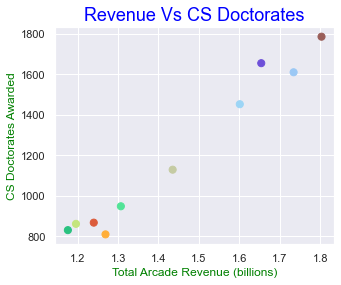

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5']

data.plot.scatter(x='Total Arcade Revenue (billions)',

y='Computer Science Doctorates Awarded (US)', c=colours , s = 50, figsize = (5,4))
plt.title('Revenue Vs CS Doctorates', color = 'Blue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Green', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Green', fontsize = 12)

Text(0, 0.5, 'CS Doctorates Awarded')

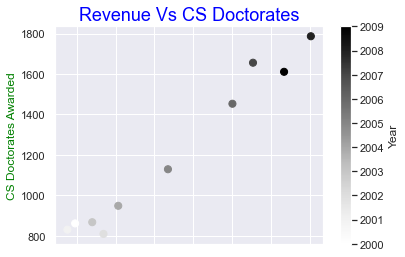

In [124]:
data.plot.scatter(x='Total Arcade Revenue (billions)',
y='Computer Science Doctorates Awarded (US)', c='Year' , s = 50)
plt.title('Revenue Vs CS Doctorates', color = 'Blue', fontsize = 18)
plt.xlabel('Total Arcade Revenue (billions)' , color = 'Green', fontsize = 12)
plt.ylabel('CS Doctorates Awarded', color = 'Green', fontsize = 12)